# **Final working project**

### Explaination

For this analyses the code will look at a player stats in football, from these stat it can be deteriment if a player is a attacking threath or more defensive player.

Goalkeepers are removed from the data, this is because a fixed position in the field

### Imports


In [1]:
# Import all necessary libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Load the raw dataset
Raw_data = pd.read_csv('fifa_players.csv')

pd.set_option('display.max_columns', None)

Raw_data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,release_clause_euro,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Messi,226500000.0,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,Lean,133800000.0,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,Normal,144200000.0,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,Normal,105400000.0,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,Normal,106500000.0,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87


### Preperation

In [2]:
# First remove goalkeepers from the dataset, their positions are not relevant for this analysis
No_GK_data = Raw_data[~Raw_data['positions'].str.contains('GK', na=False)]

# Removing columns that are not relevant for the analysis
# positions is removed, because in the future we only have data for outfield players
Removing_Coloumns_data = No_GK_data.drop(['positions',"name","full_name","weak_foot(1-5)","overall_rating","skill_moves(1-5)","birth_date","age","height_cm","weight_kgs","nationality","potential","value_euro","wage_euro","international_reputation(1-5)","national_team_position","preferred_foot","body_type","release_clause_euro","national_team","national_rating","national_jersey_number"], axis=1) #Deleting raw data

# Drop rows with missing values in features and target
Clean_data = Removing_Coloumns_data.dropna(how='any')

In [3]:
num_columns = Clean_data.shape[1]
print(f"Number of columns: {num_columns}")

Number of columns: 29


In [4]:
# Define attacking and defending attributes
attacking_attributes = [
    'crossing', 'finishing', 'short_passing', 'volleys', 'dribbling', 
    'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 
    'acceleration', 'sprint_speed', 'agility', 'positioning', 'vision', 
    'penalties', 'long_shots','composure'
]

defending_attributes = [
    'heading_accuracy', 'jumping', 'stamina', 'strength', 'aggression', 
    'interceptions', 'marking', 'standing_tackle', 'sliding_tackle', 
    'balance', 'reactions', 'shot_power'
]

# Calculate average attacking and defending scores for each player
Clean_data['attacking_score'] = Clean_data[attacking_attributes].mean(axis=1)
Clean_data['defending_score'] = Clean_data[defending_attributes].mean(axis=1)

# Combine the 2 columns into one column by choosing the higher score
Clean_data['player_type'] = Clean_data.apply(
    lambda row: 'D' if row['defending_score'] > row['attacking_score'] else 'A', axis=1
)


In [5]:
# show the devision in player types in the data
cntDiag = Clean_data["player_type"].value_counts()
propDiag = Clean_data["player_type"].value_counts(normalize=True)

print("COUNT OF PLAYER TYPES".upper())
print(cntDiag)
print("\n")
print("% OF PLAYER TYPES".upper())
print(propDiag)

COUNT OF PLAYER TYPES
player_type
D    8678
A    7211
Name: count, dtype: int64


% OF PLAYER TYPES
player_type
D    0.546164
A    0.453836
Name: proportion, dtype: float64


In [6]:
# Check data type of player_type column
Clean_data['player_type']

0        A
1        A
2        A
3        A
4        D
        ..
17948    A
17949    A
17950    D
17952    A
17953    A
Name: player_type, Length: 15889, dtype: object

In [7]:
# Change all the player types to a categorical type
# Change to catogory to work with more models
catType = CategoricalDtype(categories=["A", "D"], ordered=False)
Clean_data["player_type"] = Clean_data["player_type"].astype(catType)

#check data type of player_type column
Clean_data["player_type"]

0        A
1        A
2        A
3        A
4        D
        ..
17948    A
17949    A
17950    D
17952    A
17953    A
Name: player_type, Length: 15889, dtype: category
Categories (2, object): ['A', 'D']

In [8]:
Clean_data[['attacking_score','defending_score']].describe()

,attacking_score,defending_score
count,15889.000000,15889.000000
mean,56.959365,59.006509
std,9.903218,8.659316
min,25.117647,32.166667
25%,50.529412,52.666667
50%,57.705882,59.500000
75%,64.058824,65.500000
max,91.235294,85.666667


In [9]:
# Try to normalize the data to make it easier to work with and to compare the values
def normalize(x):
    return (x - min(x)) / (
        max(x) - min(x)
    )  # distance of item value - minimum vector value divided by the range of all vector values

In [10]:
# Normalizing the data
excluded = ["player_type"]  # list of columns to exclude
# X = Clean_data.loc[:, ~Clean_data.columns.isin(excluded)]
X = Clean_data.drop(excluded, axis=1)
X = X.apply(normalize, axis=0)
X[["attacking_score", "defending_score"]].describe()

X.head()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,attacking_score,defending_score
0,0.914634,1.000000,0.684211,0.986301,0.9500,1.000000,0.987952,1.000000,0.945946,1.000000,0.922078,0.859155,0.958904,0.984848,0.986667,0.8750,0.614286,0.637681,0.569444,1.000000,0.426829,0.146341,0.988095,1.000000,0.790123,1.000000,0.273810,0.216867,0.2000,1.000000,0.501558
1,0.939024,0.835294,0.447368,0.972603,0.8750,0.839506,0.903614,0.916667,0.945946,0.929577,0.727273,0.676056,0.780822,0.878788,0.800000,0.8625,0.357143,0.927536,0.458333,0.939759,0.402439,0.560976,0.869048,0.963415,0.691358,0.878788,0.583333,0.566265,0.1500,0.887900,0.559190
2,0.841463,0.764706,0.750000,0.904110,0.9375,0.876543,0.891566,0.857143,0.959459,0.915493,0.662338,0.760563,0.726027,0.787879,0.600000,0.9375,0.828571,0.869565,0.861111,0.855422,0.792683,0.658537,0.845238,0.926829,0.876543,0.863636,0.630952,0.686747,0.7125,0.871886,0.816199
3,0.914634,0.788235,0.500000,0.890411,0.8000,0.913580,0.915663,0.797619,0.797297,0.957746,0.961039,0.859155,0.972603,0.803030,0.960000,0.7500,0.400000,0.681159,0.263889,0.879518,0.256098,0.195122,0.857143,0.914634,0.617284,0.803030,0.488095,0.168675,0.1500,0.882562,0.389408
4,0.231707,0.141176,0.855263,0.657534,0.0500,0.654321,0.204819,0.214286,0.554054,0.535211,0.649351,0.704225,0.369863,0.787879,0.253333,0.5000,0.800000,0.681159,0.958333,0.048193,0.902439,0.951220,0.154762,0.451220,0.271605,0.757576,0.964286,0.939759,0.9625,0.312278,0.880062


In [11]:
y = Clean_data["player_type"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Modeling & Evaluation

In [12]:
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train.iloc[:,:29], y_train)

Best_metric = grid_search.best_params_['metric']
Best_weight = grid_search.best_params_['weights']
Best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.97


In [13]:
knn = KNeighborsClassifier(n_neighbors=Best_n_neighbors, metric=Best_metric, weights=Best_weight)
knn.fit(X_train.iloc[:,:29], y_train)
# # make predictions on the test set

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [14]:
y_pred = knn.predict((X_test.iloc[:,:29]))

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[2038,   74],
       [  59, 2596]])

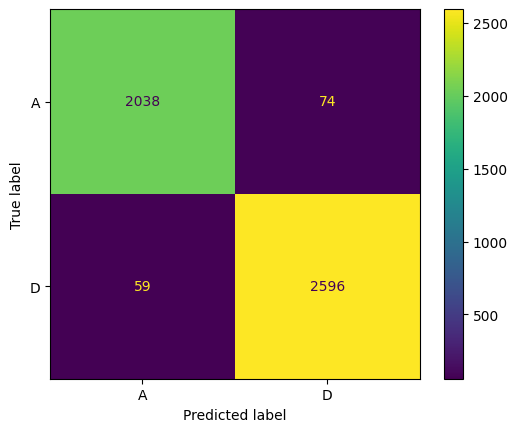

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [18]:
# Som van de diagonale waarden (correcte voorspellingen)
correct_predictions = cm.diagonal().sum()

# Totaal aantal voorspellingen
total_predictions = cm.sum()

# Bereken het succespercentage
accuracy = (correct_predictions / total_predictions) * 100
print(f"Succespercentage: {accuracy:.2f}%")

Succespercentage: 97.21%


In [19]:
# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score
 
precision = precision_score(y_test, y_pred, pos_label='A')
recall = recall_score(y_test, y_pred, pos_label='A')
f1 = f1_score(y_test, y_pred, pos_label='A')


print(f'\nAdditional Metrics:')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')
 
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Additional Metrics:
Precision: 0.9719
Recall:    0.9650
F1 Score:  0.9684

Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.96      0.97      2112
           D       0.97      0.98      0.98      2655

    accuracy                           0.97      4767
   macro avg       0.97      0.97      0.97      4767
weighted avg       0.97      0.97      0.97      4767



1. Accuracy
What it means:
The percentage of correct predictions (both Attackers and Defenders) out of all predictions.
Example:
If accuracy is 0.85, the model is correct 85% of the time.
Limitation:
Can be misleading if one class (e.g., Defenders) is much rarer than the other.
2. Precision
What it means:
When the model predicts "Attacker," how often is it actually correct?
Formula:
True Attackers / (True Attackers + False Attackers)
Example:
Precision = 0.90 means when the model says "Attacker," it’s right 90% of the time.
3. Recall (Sensitivity)
What it means:
How many real Attackers did the model actually find?
Formula:
True Attackers / (True Attackers + Missed Attackers)
Example:
Recall = 0.80 means the model caught 80% of all true Attackers (but missed 20%).
4. F1 Score
What it means:
A balance between Precision and Recall (harmonic mean). Useful when classes are imbalanced.
Why it matters:
High F1 (close to 1): Model is good at both finding Attackers and being correct.
Low F1 (close to 0): Model is either missing too many Attackers (low Recall) or making too many false alarms (low Precision).
 